In [1]:
#importing libraries
from tweepy import API, OAuthHandler
from textblob import TextBlob
import tweepy
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
api_key = 'xxxxxxxxxx'
api_secret_key = 'xxxxxxxxxxxxxxxxxxxxxxxxx'

In [3]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)

In [4]:
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
wizkid = []
for page in tweepy.Cursor(api.search, q='wizkid', count=20).pages(600):#grabbing twe   ets about wizkid
    for item in page:
        wizkid.append(item.text)

In [6]:
len(wizkid)

11687

In [7]:
davido = []
for page in tweepy.Cursor(api.search, q='davido', count=20).pages(600):#grabbing tweets about davido
    for item in page:
        davido.append(item.text)

In [8]:
len(davido)

11932

In [9]:
burnaboy = []
for page in tweepy.Cursor(api.search, q='burnaboy', count=20).pages(600):#grabbing tweets about burnaboy
    for item in page:
        burnaboy.append(item.text)

In [10]:
len(burnaboy)

11909

In [11]:
#deleting some tweets so lists can be same length to create a dataframe
del davido[:245]
del burnaboy[:222]

In [12]:
len(burnaboy)

11687

In [13]:
df = pd.DataFrame(list(zip(wizkid, davido, burnaboy)),columns = ['Wizkid', 'Davido', 'Burnaboy'])

In [14]:
#creating function to clean columns
def clean_tweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)#removing mentions
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)#removing urls
    txt = re.sub(r'#', '', txt)#removing hashtags
    txt = re.sub(r'RT : ', '', txt)#removing retweets
    return txt

In [15]:
#applying function to columns
df['Wizkid'] = df['Wizkid'].apply(clean_tweet)
df['Davido'] = df['Davido'].apply(clean_tweet)
df['Burnaboy'] = df['Burnaboy'].apply(clean_tweet)
df.head()

,Wizkid,Davido,Burnaboy
0,I will not forgive you davido for not signi...,Since nobody is helping I want to sell my phon...,"""Shey na here we go dey forever """
1,Few days ago some riffraffs called me a toxic ...,2 years ago today ... I sold out arena london...,Knocking kpo kpo kpo
2,"Wizkid fc I beg una ehn, the way joro dey go ...",Do you remember the RMD actor that sent Davido...,You be big fool ..... Dem come tell you say ...
3,"Wizkid fc and foolishness 5/6, somebo…","5 minutes into my kidnapping \n\nMe: Bros, Abe...",
4,Chidinma’s Emi Ni Baller Remix featuring Wizki...,"Follow now🙏 DAVIDO Ghana🇬🇭Fanpage, \n\n30BG",🦍


In [16]:
df.to_csv('Wizkid_Davido_Burna_tweet.csv')

In [17]:
#defining function to get subjectivity and polarity
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [18]:
df['Wiz_Subjectivity'] = df['Wizkid'].apply(getSubjectivity)
df['Wiz_Polarity'] = df['Wizkid'].apply(getPolarity)
df['Dav_Subjectivity'] = df['Davido'].apply(getSubjectivity)
df['Dav_Polarity'] = df['Davido'].apply(getPolarity)
df['Bur_Subjectivity'] = df['Burnaboy'].apply(getSubjectivity)
df['Bur_Polarity'] = df['Burnaboy'].apply(getPolarity)
df.head()

,Wizkid,Davido,Burnaboy,Wiz_Subjectivity,Wiz_Polarity,Dav_Subjectivity,Dav_Polarity,Bur_Subjectivity,Bur_Polarity
0,I will not forgive you davido for not signi...,Since nobody is helping I want to sell my phon...,"""Shey na here we go dey forever """,0.000000,0.000,0.8500,0.250000,0.0,0.0
1,Few days ago some riffraffs called me a toxic ...,2 years ago today ... I sold out arena london...,Knocking kpo kpo kpo,0.100000,-0.200,0.0000,0.000000,0.0,0.0
2,"Wizkid fc I beg una ehn, the way joro dey go ...",Do you remember the RMD actor that sent Davido...,You be big fool ..... Dem come tell you say ...,0.366667,0.325,0.4375,0.005682,0.1,0.0
3,"Wizkid fc and foolishness 5/6, somebo…","5 minutes into my kidnapping \n\nMe: Bros, Abe...",,0.000000,0.000,0.0000,0.000000,0.0,0.0
4,Chidinma’s Emi Ni Baller Remix featuring Wizki...,"Follow now🙏 DAVIDO Ghana🇬🇭Fanpage, \n\n30BG",🦍,0.000000,0.000,0.0000,0.000000,0.0,0.0


In [19]:
#function to return sentiment from polarity column
def get_text_analysis(t):
    if t < 0:
        return 'Negative'
    elif t == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [20]:
df['Wiz_Sentiment'] = df['Wiz_Polarity'].apply(get_text_analysis)
df['Dav_Sentiment'] = df['Dav_Polarity'].apply(get_text_analysis)
df['Bur_Sentiment'] = df['Bur_Polarity'].apply(get_text_analysis)
df.head()

,Wizkid,Davido,Burnaboy,Wiz_Subjectivity,Wiz_Polarity,Dav_Subjectivity,Dav_Polarity,Bur_Subjectivity,Bur_Polarity,Wiz_Sentiment,Dav_Sentiment,Bur_Sentiment
0,I will not forgive you davido for not signi...,Since nobody is helping I want to sell my phon...,"""Shey na here we go dey forever """,0.000000,0.000,0.8500,0.250000,0.0,0.0,Neutral,Positive,Neutral
1,Few days ago some riffraffs called me a toxic ...,2 years ago today ... I sold out arena london...,Knocking kpo kpo kpo,0.100000,-0.200,0.0000,0.000000,0.0,0.0,Negative,Neutral,Neutral
2,"Wizkid fc I beg una ehn, the way joro dey go ...",Do you remember the RMD actor that sent Davido...,You be big fool ..... Dem come tell you say ...,0.366667,0.325,0.4375,0.005682,0.1,0.0,Positive,Positive,Neutral
3,"Wizkid fc and foolishness 5/6, somebo…","5 minutes into my kidnapping \n\nMe: Bros, Abe...",,0.000000,0.000,0.0000,0.000000,0.0,0.0,Neutral,Neutral,Neutral
4,Chidinma’s Emi Ni Baller Remix featuring Wizki...,"Follow now🙏 DAVIDO Ghana🇬🇭Fanpage, \n\n30BG",🦍,0.000000,0.000,0.0000,0.000000,0.0,0.0,Neutral,Neutral,Neutral


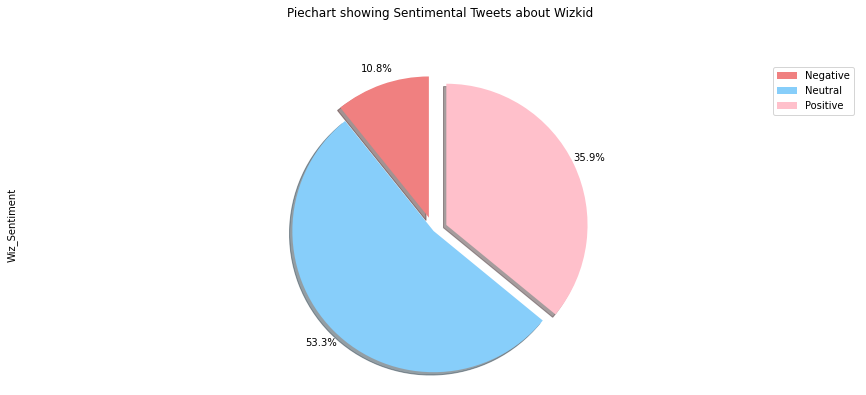

In [21]:
colors_list = ['lightcoral', 'lightskyblue', 'pink']
explode_list = [0.1, 0, 0.1] # ratio for each sentiment with which to offset each wedge.
wiz_sentiment = df.groupby(df['Wiz_Sentiment'])['Wiz_Sentiment'].count()
wiz_sentiment.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Piechart showing Sentimental Tweets about Wizkid', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=wiz_sentiment.index, loc='best') 

plt.show()

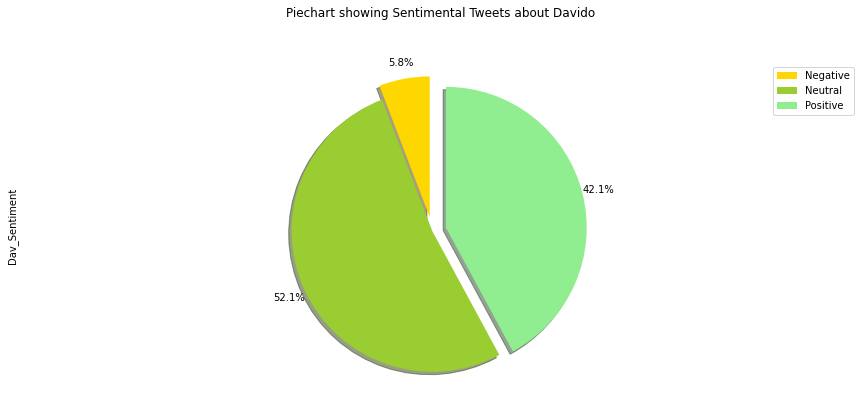

In [22]:
colors_list = ['gold', 'yellowgreen', 'lightgreen']
explode_list = [0.1, 0, 0.1] 
dav_sentiment = df.groupby(df['Dav_Sentiment'])['Dav_Sentiment'].count()
dav_sentiment.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,     
                            colors=colors_list,  
                            explode=explode_list 
                            )


plt.title('Piechart showing Sentimental Tweets about Davido', y=1.12) 

plt.axis('equal') 


plt.legend(labels=dav_sentiment.index, loc='best') 

plt.show()

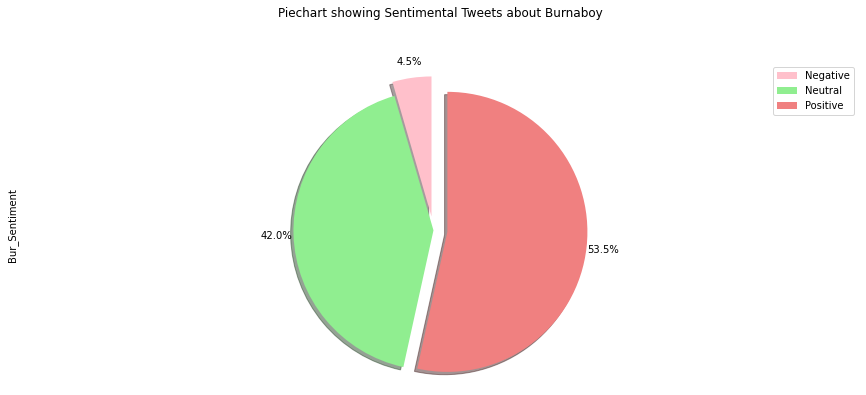

In [23]:
colors_list = ['pink', 'lightgreen', 'lightcoral']
explode_list = [0.1, 0, 0.1] 
bur_sentiment = df.groupby(df['Bur_Sentiment'])['Bur_Sentiment'].count()
bur_sentiment.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,     
                            colors=colors_list,  
                            explode=explode_list 
                            )


plt.title('Piechart showing Sentimental Tweets about Burnaboy', y=1.12) 

plt.axis('equal') 


plt.legend(labels=bur_sentiment.index, loc='best') 

plt.show()

In [24]:
df1 = pd.DataFrame({'Artist': ['Wizkid', 'Davido', 'Burnaboy'], 'Positive' : [wiz_sentiment[2], dav_sentiment[2], 
                    bur_sentiment[2]], 'Negative' : [wiz_sentiment[0], dav_sentiment[0], bur_sentiment[0]], 
                    'Neutral' : [wiz_sentiment[1], dav_sentiment[1],  bur_sentiment[1]]})
df1 

,Artist,Positive,Negative,Neutral
0,Wizkid,4199,1260,6228
1,Davido,4921,679,6087
2,Burnaboy,6247,526,4914


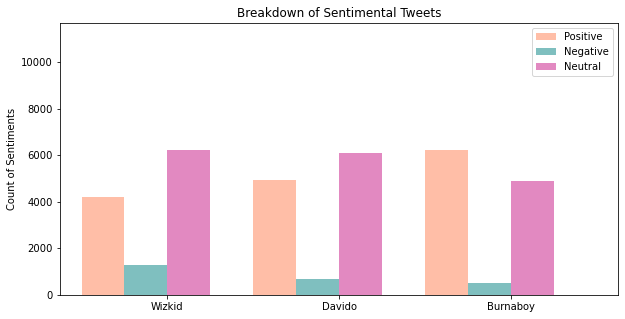

In [25]:
pos = list(range(len(df1['Positive'])))
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, df1['Positive'], width, alpha=0.5, color='coral', label='Positive')
plt.bar([p + width for p in pos], df1['Negative'], width, alpha=0.5, color= 'teal', label='Negative')
plt.bar([p + width*2 for p in pos], df1['Neutral'], width, alpha=0.5, color= 'mediumvioletred', label='Neutral')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df1['Artist'])
ax.set_ylabel('Count of Sentiments')
ax.set_title('Breakdown of Sentimental Tweets')
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df1['Positive'] + df1['Negative'] + df1['Neutral'])])
plt.legend()
plt.show()